In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
subset = False
fol = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/Realdata/corr/Morecelltypes/HardRC_corr/perctcorr/hardRC'

files = os.listdir(fol)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')

if '.DS_Store' in files:
    files.remove('.DS_Store')

In [3]:
dfs = []
for i, file in enumerate(files):
    data = pd.read_csv(fol + '/' + file, sep='\t', index_col=0)
    df = pd.DataFrame(data)
    dfs.append(df.copy())
    
for i, df in enumerate(dfs):
    cols = []
    for cell in list(df.columns):
        if '.x' in cell:
            cols.append(cell.split('.')[0])
        elif '.y' in cell:
            cols.append(cell.split('.')[0] + '_real')
        else:
            cols.append(cell)
    df.columns = cols

for i, df in enumerate(dfs): 
    if i == 0:
        samples = list(df.index)
        columns = list(df.columns)
    else:
        new_samples = list(df.index)
        new_columns = list(df.columns)
        samples = list(set(new_samples).intersection(samples))
        columns = list(set(new_columns + columns))
    columns = list(set(columns))


new_columns = []
for col in columns:
    if '_real' in col:
        new_columns.append(col.split('_')[0])
        
columns = new_columns
print(columns)

['ed8', 'cm4', 'NaiveCD8', 'Tregs', 'mB', 'cm8', 'em8', 'em4', 'PC', 'NaiveCD4', 'Mono', 'NK', 'nB']


In [4]:
def generate_df_dic(correlation, dfs, columns):
    df_corr = {}
    for i, df in enumerate(dfs):
        if subset:
            df = df.loc[samples, :]
        for cell in columns:
            if cell in df.columns:
                if cell not in df_corr:
                    df_corr[cell] = []
                corr = correlation(list(df[cell]), list(df[cell + '_real']))[0]
                df_corr[cell].append(corr)
            else:
                df_corr[cell].append(float('NaN'))
    return df_corr

In [5]:
df_pearson_dic = generate_df_dic(pearsonr, dfs, columns)
df_spearman_dic = generate_df_dic(spearmanr, dfs, columns)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:387: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [6]:
df_pearson = pd.DataFrame.from_dict(df_pearson_dic, orient='index', columns = files)
df_spearman = pd.DataFrame.from_dict(df_spearman_dic, orient='index', columns = files)
display(df_pearson)

df_pearson.to_csv(fol + '_pearson_correlation.txt', sep='\t')
df_spearman.to_csv(fol + '_spearman_correlation.txt', sep='\t')

,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.5_mincpg3_CSxOut.txt_cytof_fixedDCm5trfixed.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.5_mincpg1_CSxOut.txt_cytof_fixedDCm5trfixed.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.8_mincpg1_CSxOut.txt_cytof_fixedDCm5trfixed.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.8_mincpg3_CSxOut.txt_cytof_fixedDCm5trfixed.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.65_mincpg1_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.5_mincpg3_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.8_mincpg3_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.5_mincpg1_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.65_mincpg1_CSxOut.txt_cytof_fixedDCm5trfixed.txt,BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_pattern.8_mincpg1_CSxOut.txt_1stflow_7samples_fixedDCm4trfixed_morect_8subsetANDPCfromcytof.txt
ed8,0.517821,0.607852,0.630683,0.484291,0.624585,0.517821,0.484291,0.607852,0.624585,0.630683
cm4,0.458228,0.787771,0.769717,0.458228,0.483980,0.011688,0.011688,0.477685,0.788161,0.466633
NaiveCD8,0.709994,0.706045,0.683753,0.651352,0.490058,0.561863,0.490139,0.490243,0.701067,0.465880
Tregs,0.685010,0.862649,0.873077,0.441588,0.726035,0.667887,0.430514,0.743793,0.881219,0.659470
mB,0.744960,0.446456,0.536049,0.744960,0.847120,0.791779,0.791779,0.655320,0.581022,0.831109
cm8,0.633600,0.887456,0.895763,0.861352,0.876412,0.633600,0.861352,0.887456,0.876412,0.895763
em8,0.088976,0.585747,0.577931,-0.107496,0.577500,0.088976,-0.107496,0.585747,0.577500,0.577931
em4,0.606524,0.477596,0.259361,0.072415,0.470406,0.570420,0.305018,0.457799,0.421418,0.392913
PC,-0.258199,0.112612,0.013470,-0.258199,0.013470,-0.258199,-0.258199,0.112612,0.013470,0.013470
NaiveCD4,0.605578,0.729363,0.715528,0.607178,0.599993,0.407528,0.380444,0.654537,0.716511,0.603154


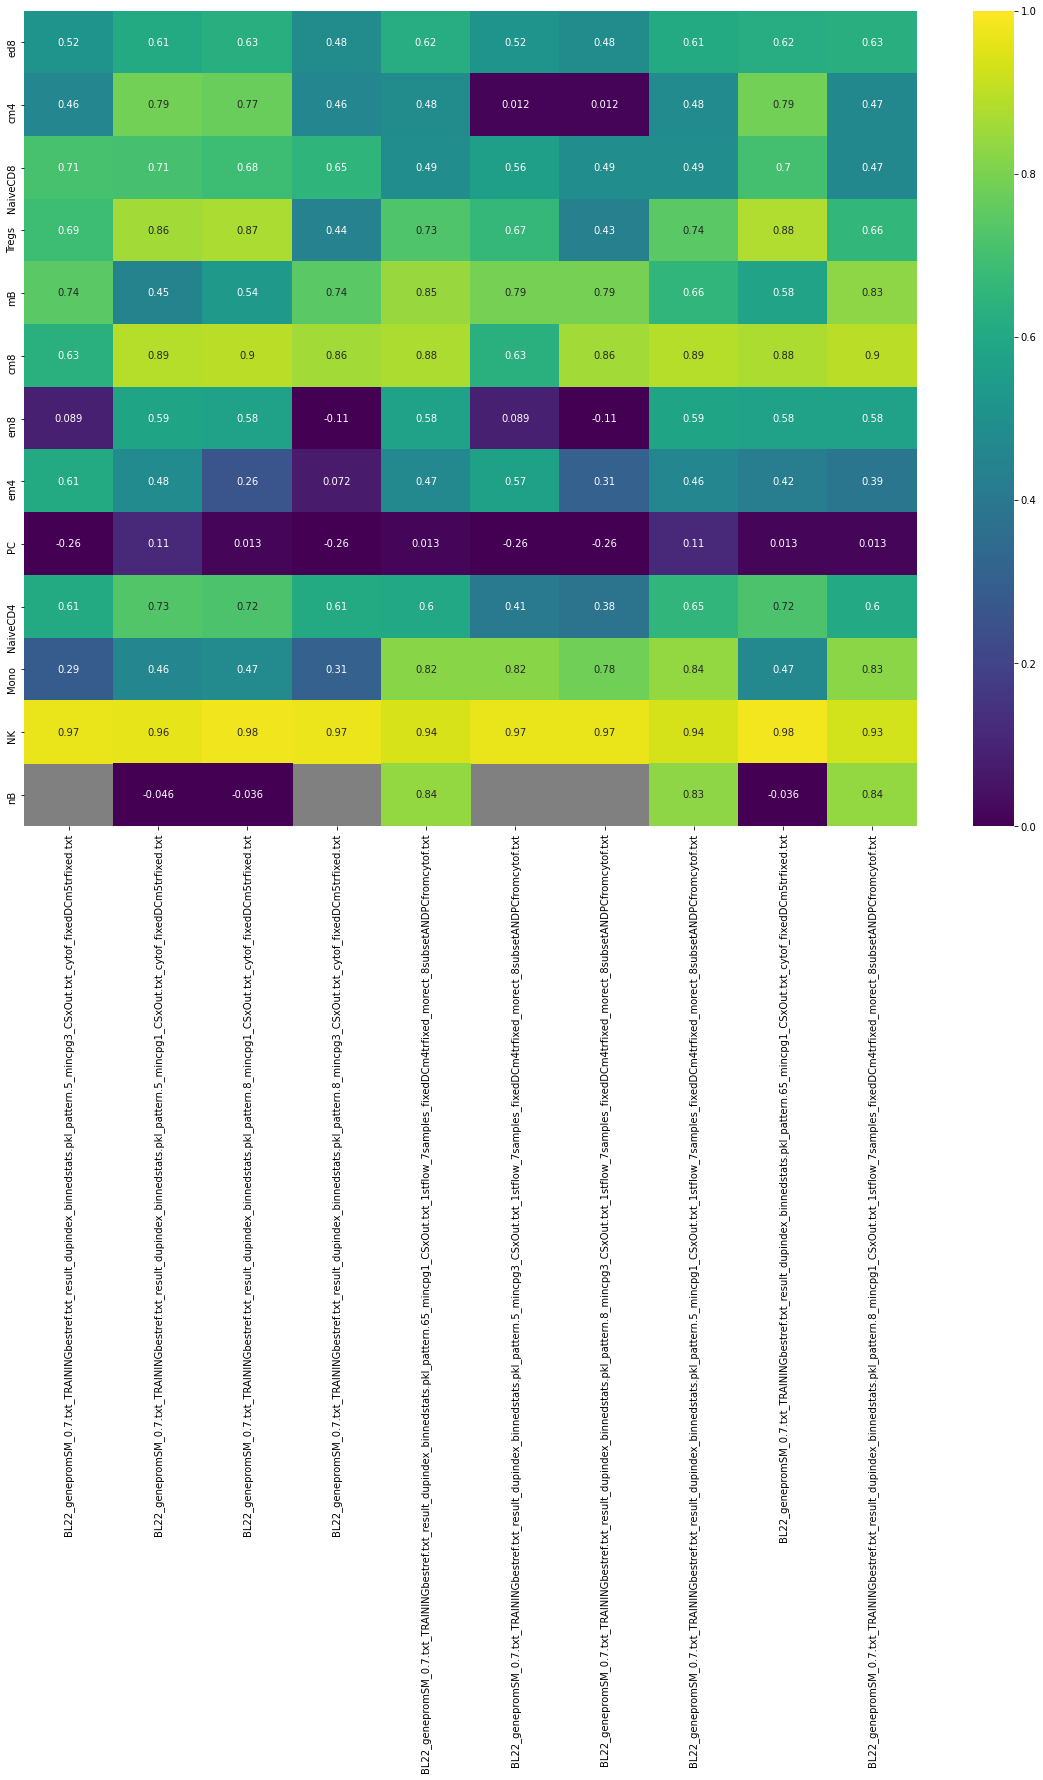

In [7]:
plt.figure(figsize=(20,15))
pearson_heatmap = sns.heatmap(df_pearson, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
pearson_heatmap.set_facecolor('gray')
plt.savefig(fol + '_pearson_heatmap.pdf', bbox_inches='tight')

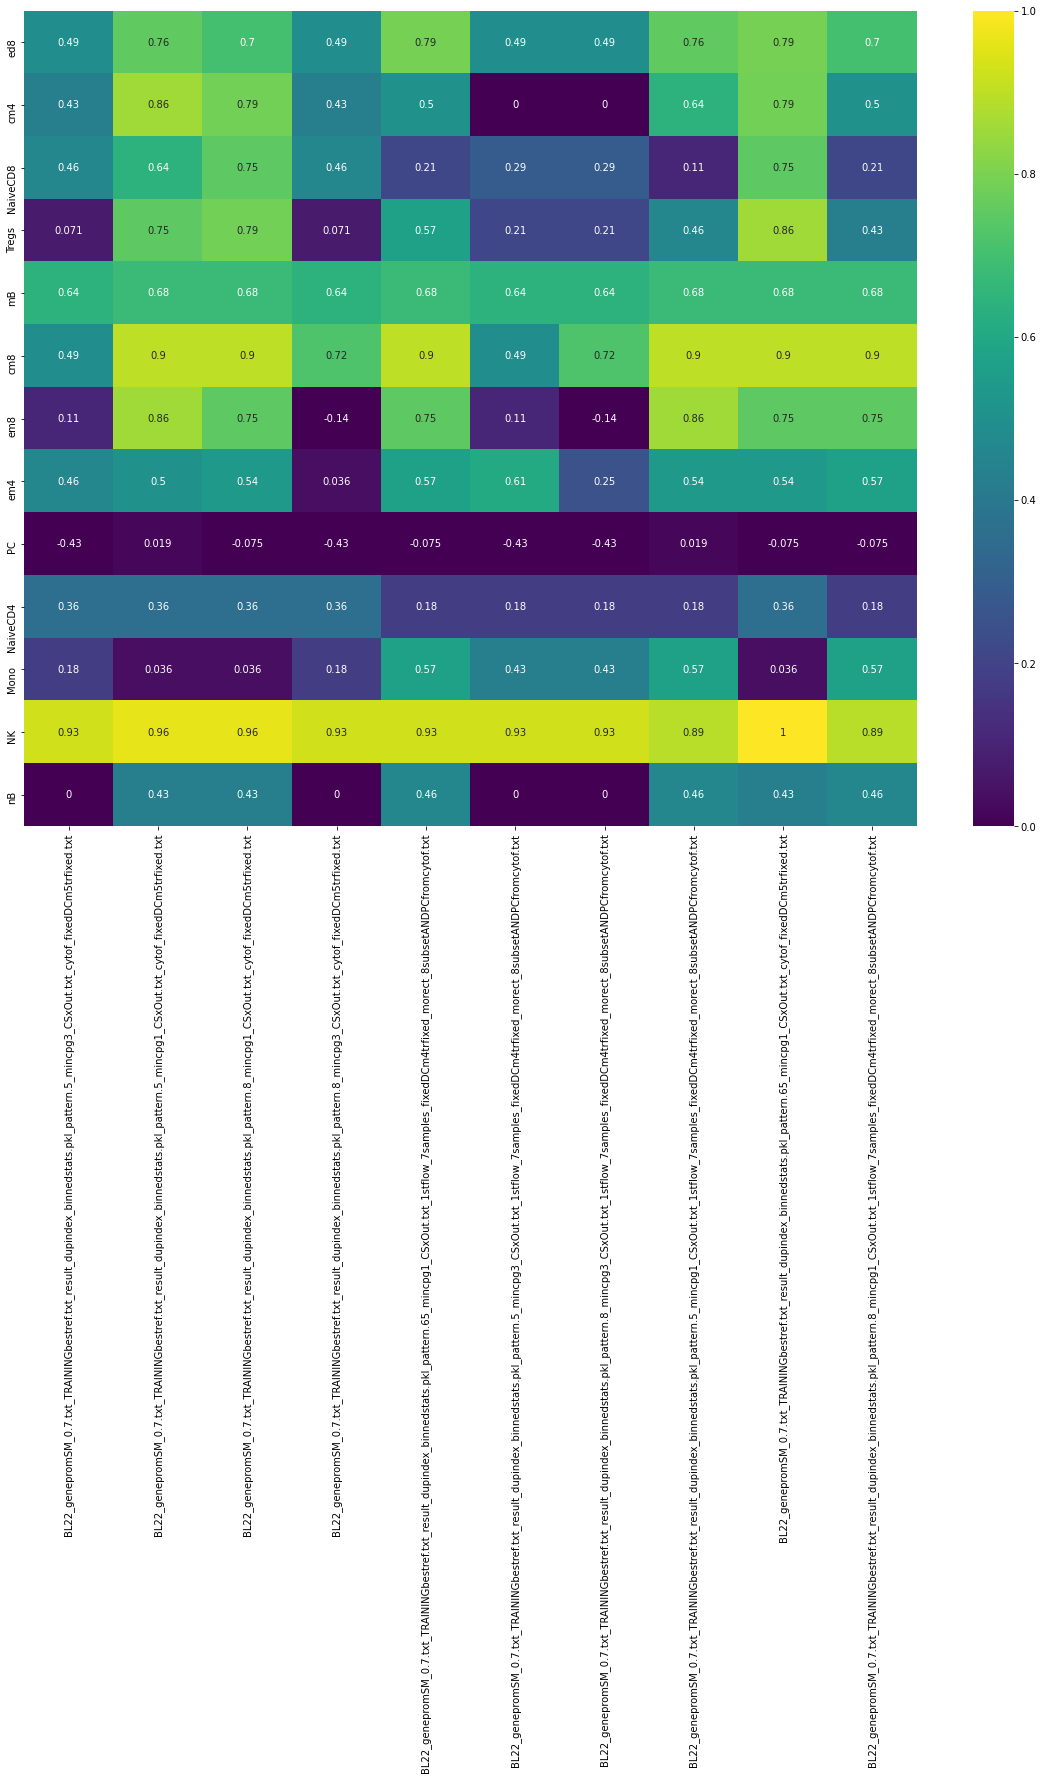

In [8]:
plt.figure(figsize=(20,15))
spearman_heatmap = sns.heatmap(df_spearman, cmap='viridis', annot=True, vmin=0.0, vmax=1.0)
spearman_heatmap.set_facecolor('gray')
plt.savefig(fol + '_spearman_heatmap.pdf', bbox_inches='tight')